# Step 1: Import Libraries & Load the Dataset

* Imported essential libraries for data manipulation and visualization
* Loaded the dataset (marketing_data.csv)
* Displayed the first few rows to verify successful loading
* Checked the dataset shape and structure

## Import required libraries:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, mannwhitneyu, pointbiserialr

In [20]:
# Load dataset

df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [21]:
# Check shape and info

print("Shape:", df.shape)
df.info()

Shape: (2240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   

# Step 2: Initial Data Inspection

* Checked column names and identified any irregular formatting
* Reviewed summary statistics for numerical variables
* Inspected missing values across all columns
* Verified that key variables (Income, Dt_Customer) require cleaning

In [22]:
# View column names

df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 ' Income ',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [23]:
# Summary statistics for numeric columns

df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Check missing values in each column

df.isna().sum().sort_values(ascending=False)

 Income                24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [25]:
# Preview unique values for key categorical columns

print("Education:", df['Education'].unique())
print("Marital_Status:", df['Marital_Status'].unique())
print("Country:", df['Country'].unique())

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Country: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


# Step 3: Data Cleaning

## 3.1 - Clean Column Names

* Cleaned column names by removing leading/trailing whitespace
* Standardized column names by replacing spaces with underscores
* Ensured consistent naming for later processing

In [26]:
# Clean Column Names

df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

## 3.2 - Fix Income Formatting
* Remove $, ,, and whitespace
* Convert Income to numeric
* Confirm missing-value count

In [28]:
# Fix Income formatting

df['Income'] = (
    df['Income']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip()
)

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

df['Income'].isna().sum()

np.int64(24)

## 3.3 - Clean Marital_Status Categories

* Standardize inconsistent categories (Alone, YOLO, Absurd, etc.)
* Map them into consistent groups: Married, Single, Previously_Married
* Ensure categories match the business logic

In [29]:
# Clean Marital_Status categories

marital_map = {
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single',
    'Divorced': 'Previously_Married',
    'Widow': 'Previously_Married'
}

df['Marital_Status'] = df['Marital_Status'].map(marital_map)

df['Marital_Status'].value_counts()

Marital_Status
Married               1444
Single                 487
Previously_Married     309
Name: count, dtype: int64

## 3.4 - Clean Education Categories

The dataset sometimes contains inconsistent education labels.
This step will:

* Standardize education categories
* Ensure categories match the expected five groups
* Verify final unique values

In [32]:
# Clean Education categories

edu_map = {
    'Graduation': 'Graduation',
    'PhD': 'PhD',
    '2n Cycle': '2n Cycle',
    'Master': 'Master',
    'Basic': 'Basic'
}

df['Education'] = df['Education'].map(edu_map)

df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

## 3.5 - Convert Dt_Customer to Datetime Format

* Convert the Dt_Customer field from string to datetime
* Ensure proper recognition of month/day/year format
* Verify successful conversion

In [33]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

df['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

## 3.6 - Impute Missing Income Values

According to the problem statement:
`Customers with similar education and marital status tend to have similar yearly incomes on average.`

So we will:

* Group by Education + Marital_Status
* Compute median income for each group
* Fill missing Income values accordingly
* Verify no missing values remain

In [35]:
# compute median income by Education + Marital_Status
group_medians = df.groupby(['Education', 'Marital_Status'])['Income'].median()

# fill missing income
df['Income'] = df.apply(
    lambda row: group_medians[row['Education'], row['Marital_Status']]
    if pd.isna(row['Income']) else row['Income'],
    axis=1
)

df['Income'].isna().sum()

np.int64(0)

# Step 4: Feature Engineering

## Create feature columns

* Derived TotalChildren
* Calculated Age
* Created TotalSpending
* Derived TotalPurchases for all channels

In [36]:
# total children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# age (using 2025 as reference year)
df['Age'] = 2025 - df['Year_Birth']

# total spending across product categories
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['TotalSpending'] = df[spending_cols].sum(axis=1)

# total purchases across all channels
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

df[['TotalChildren', 'Age', 'TotalSpending', 'TotalPurchases']].head()

,TotalChildren,Age,TotalSpending,TotalPurchases
0,0,55,1190,14
1,0,64,577,17
2,1,67,251,10
3,2,58,11,3
4,1,36,91,6


# Step 5: Outlier Treatment for Income

* Calculated 1st and 99th percentiles
* Capped values outside this range
* Replaced original Income with capped values
* Verified updated distribution

In [37]:
# compute percentiles
Q1 = df['Income'].quantile(0.01)
Q99 = df['Income'].quantile(0.99)

# cap outliers
df['Income_capped'] = df['Income'].clip(lower=Q1, upper=Q99)

# replace original column
df['Income'] = df['Income_capped']
df.drop(columns=['Income_capped'], inplace=True)

df['Income'].describe()

count     2240.000000
mean     51762.999464
std      20616.153112
min       7705.920000
25%      35538.750000
50%      51342.000000
75%      68289.750000
max      94437.680000
Name: Income, dtype: float64

# Step 6: Remove Unrealistic Age Values

* Checked for customers with Age > 100
* Removed those rows from the dataset
* Verified that no unrealistic ages remain

In [40]:
# inspect rows with unrealistic ages
df[df['Age'] > 100][['ID', 'Year_Birth', 'Age']]

# remove ages > 100
df = df[df['Age'] <= 100].copy()

df[df['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalChildren,Age,TotalSpending,TotalPurchases


# Step 7: Encoding Categorical Variables

* Applied ordinal encoding to Education
* Created one-hot encoded variables for Marital_Status
* Created one-hot encoded variables for Country
* Joined encoded columns back to the main DataFrame

In [42]:
# Ordinal encoding for Education:

edu_order = {
    'Basic': 1,
    '2n_Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

# fix column name
df['Education'] = df['Education'].str.replace('2n Cycle', '2n_Cycle')

df['Education_ord'] = df['Education'].map(edu_order)

df[['Education', 'Education_ord']].head()

,Education,Education_ord
0,Graduation,3
1,Graduation,3
2,Graduation,3
3,Graduation,3
4,Graduation,3


In [43]:
# One-hot encoding for Marital_Status:

marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
df = pd.concat([df, marital_dummies], axis=1)

marital_dummies.head()

,Marital_Married,Marital_Previously_Married,Marital_Single
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [44]:
# One-hot encoding for Country:

country_dummies = pd.get_dummies(df['Country'], prefix='Country')
df = pd.concat([df, country_dummies], axis=1)

country_dummies.head()

,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False


# Step 8: Correlation Heatmap

* Select only numeric columns
* Compute the correlation matrix
* Plot a heatmap for visual interpretation

In [45]:
# Select numeric columns and compute correlation:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
corr_matrix

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,TotalChildren,Age,TotalSpending,TotalPurchases,Education_ord
ID,1.000000,0.003024,0.002879,0.002202,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,...,-0.005062,-0.021524,-0.015027,-0.021810,0.031520,-0.000989,-0.003024,-0.015830,-0.014021,-0.000496
Year_Birth,0.003024,1.000000,-0.208115,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,...,0.015322,-0.008227,-0.007657,0.018424,-0.004479,-0.095481,-1.000000,-0.113865,-0.173200,-0.193869
Income,0.002879,-0.208115,1.000000,-0.524802,0.040044,0.006729,0.717841,0.528080,0.685489,0.542402,...,0.408476,0.336654,0.107633,0.168745,-0.028015,-0.346766,0.208115,0.814462,0.764183,0.177281
Kidhome,0.002202,0.234133,-0.524802,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,...,-0.204994,-0.172512,-0.081794,-0.080176,0.036283,0.690121,-0.234133,-0.556902,-0.569244,-0.053068
Teenhome,-0.003543,-0.363350,0.040044,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,...,-0.190227,-0.140288,-0.015664,-0.154730,0.007591,0.698558,0.363350,-0.137769,0.038134,0.135692
Recency,-0.046755,-0.019670,0.006729,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,...,0.000956,-0.019258,-0.001764,-0.198568,0.005398,0.017796,0.019670,0.021199,0.006734,-0.013926
MntWines,-0.021181,-0.163035,0.717841,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,...,0.471969,0.354365,0.206040,0.247392,-0.035930,-0.351487,0.163035,0.891734,0.756494,0.212500
MntFruits,0.007080,-0.013751,0.528080,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,...,0.212027,0.195380,-0.009701,0.125904,-0.002800,-0.394122,0.013751,0.613122,0.521227,-0.077928
MntMeatProducts,-0.002622,-0.030927,0.685489,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,...,0.372212,0.310096,0.043090,0.236640,-0.020720,-0.501814,0.030927,0.842655,0.623373,0.041904
MntFishProducts,-0.023181,-0.042519,0.542402,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,...,0.198163,0.260908,0.002583,0.111415,-0.018818,-0.425136,0.042519,0.642395,0.537435,-0.101987


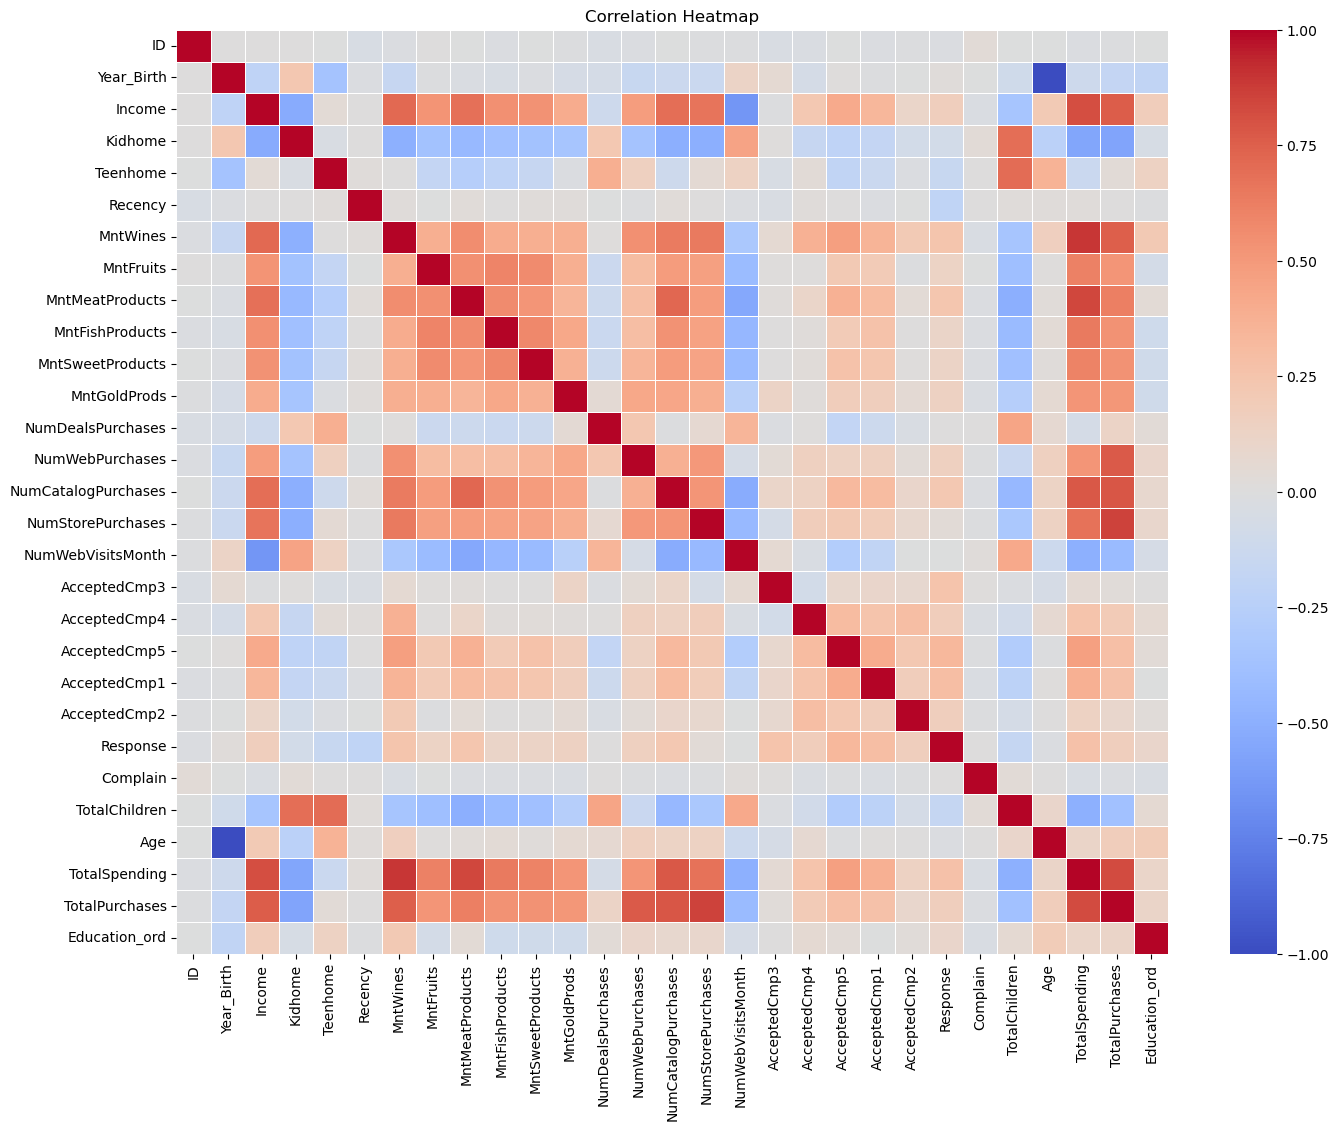

In [46]:
# Plot heatmap:

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Hypothesis Testing

## 9.1 - Hypothesis A - Age vs Store Purchases

* Compared Age with number of in-store purchases
* Visualized relationship using a scatter plot
* Calculated Pearson correlation coefficient
* Evaluated statistical significance

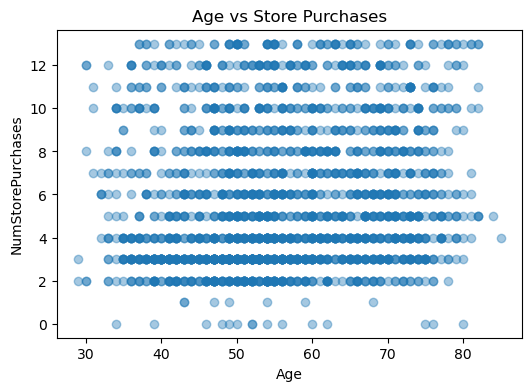

In [48]:
# Scatter plot:

plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['NumStorePurchases'], alpha=0.4)
plt.xlabel('Age')
plt.ylabel('NumStorePurchases')
plt.title('Age vs Store Purchases')
plt.show()

In [49]:
# Pearson correlation test:

r, p = pearsonr(df['Age'], df['NumStorePurchases'])

print("Correlation coefficient (r):", r)
print("p-value:", p)

Correlation coefficient (r): 0.13946510380279412
p-value: 3.472816546739386e-11


## 9.2 - Hypothesis B - Children vs Online Purchases

* Compared TotalChildren with number of online purchases
* Visualized distributions using a boxplot
* Performed the Spearman rank correlation test
* Checked if online purchases increase with more children

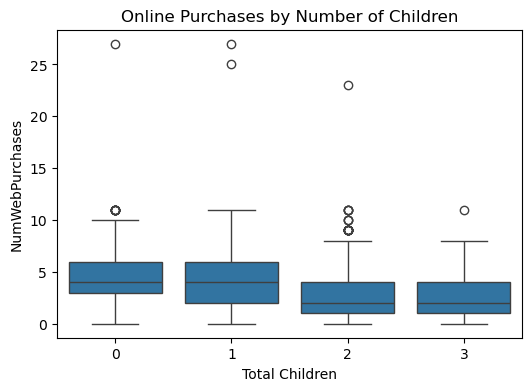

In [50]:
# Boxplot:

plt.figure(figsize=(6,4))
sns.boxplot(x=df['TotalChildren'], y=df['NumWebPurchases'])
plt.xlabel('Total Children')
plt.ylabel('NumWebPurchases')
plt.title('Online Purchases by Number of Children')
plt.show()

In [52]:
# Spearman correlation test:

rho, p = spearmanr(df['TotalChildren'], df['NumWebPurchases'])

print("Spearman rho:", rho)
print("p-value:", p)

Spearman rho: -0.1853333569053294
p-value: 9.791403824731e-19


## 9.3 - Hypothesis C — Store vs Web & Catalog Purchases

* Visualized relationships using scatterplots
* Performed Pearson correlation tests
* Checked if online/catalog sales negatively impact store sales

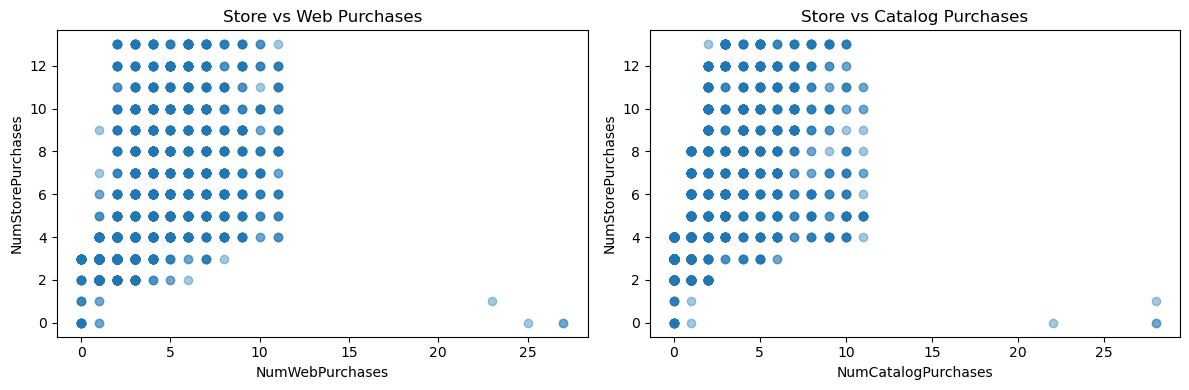

In [53]:
# Scatterplots:

plt.figure(figsize=(12,4))

# Store vs Web
plt.subplot(1,2,1)
plt.scatter(df['NumWebPurchases'], df['NumStorePurchases'], alpha=0.4)
plt.xlabel('NumWebPurchases')
plt.ylabel('NumStorePurchases')
plt.title('Store vs Web Purchases')

# Store vs Catalog
plt.subplot(1,2,2)
plt.scatter(df['NumCatalogPurchases'], df['NumStorePurchases'], alpha=0.4)
plt.xlabel('NumCatalogPurchases')
plt.ylabel('NumStorePurchases')
plt.title('Store vs Catalog Purchases')

plt.tight_layout()
plt.show()

In [54]:
# Correlation tests:

# Store vs Web
r_web, p_web = pearsonr(df['NumStorePurchases'], df['NumWebPurchases'])

# Store vs Catalog
r_cat, p_cat = pearsonr(df['NumStorePurchases'], df['NumCatalogPurchases'])

print("Store vs Web: r =", r_web, ", p-value =", p_web)
print("Store vs Catalog: r =", r_cat, ", p-value =", p_cat)

Store vs Web: r = 0.5022771005445519 , p-value = 2.676589141084666e-143
Store vs Catalog: r = 0.5188838960472143 , p-value = 1.9038335885192102e-154


## 9.4 - Hypothesis D - US vs Non-US Spending

* Created two groups (US vs Non-US)
* Visualized spending distributions
* Performed Mann–Whitney U test
* Checked if the difference is statistically significant

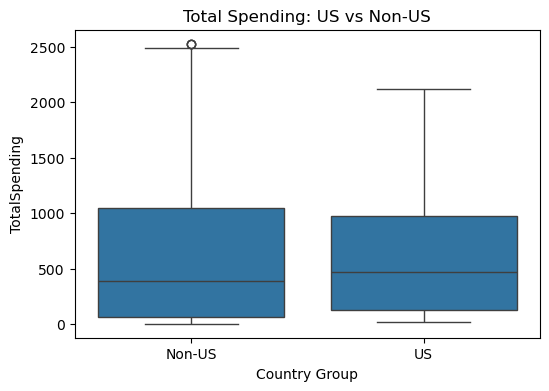

In [55]:
# Boxplot:

plt.figure(figsize=(6,4))

sns.boxplot(
    x = df['Country'].apply(lambda x: 'US' if x=='US' else 'Non-US'),
    y = df['TotalSpending']
)

plt.xlabel('Country Group')
plt.ylabel('TotalSpending')
plt.title('Total Spending: US vs Non-US')
plt.show()

In [56]:
# Median spending:

df.groupby(df['Country'].apply(lambda x: 'US' if x=='US' else 'Non-US'))['TotalSpending'].median()

Country
Non-US    393.0
US        467.0
Name: TotalSpending, dtype: float64

In [58]:
# Mann–Whitney U test:

us_spend = df[df['Country']=='US']['TotalSpending']
nonus_spend = df[df['Country']!='US']['TotalSpending']

stat, p = mannwhitneyu(us_spend, nonus_spend, alternative='two-sided')

print("Mann–Whitney U statistic:", stat)
print("p-value:", p)
print("\nUS median:", us_spend.median())
print("Non-US median:", nonus_spend.median())

Mann–Whitney U statistic: 123822.5
p-value: 0.23290054549364958

US median: 467.0
Non-US median: 393.0


# Step 10: Visual Analysis

## 10.1 - Product Revenue Analysis

* Calculated revenue across all product categories
* Identified top and bottom performers
* Visualized using a bar chart

In [59]:
# Calculate product revenues:

product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

product_revenue = df[product_cols].sum().sort_values(ascending=False)
product_revenue

MntWines            680038
MntMeatProducts     373393
MntGoldProds         98358
MntFishProducts      83939
MntSweetProducts     60553
MntFruits            58767
dtype: int64

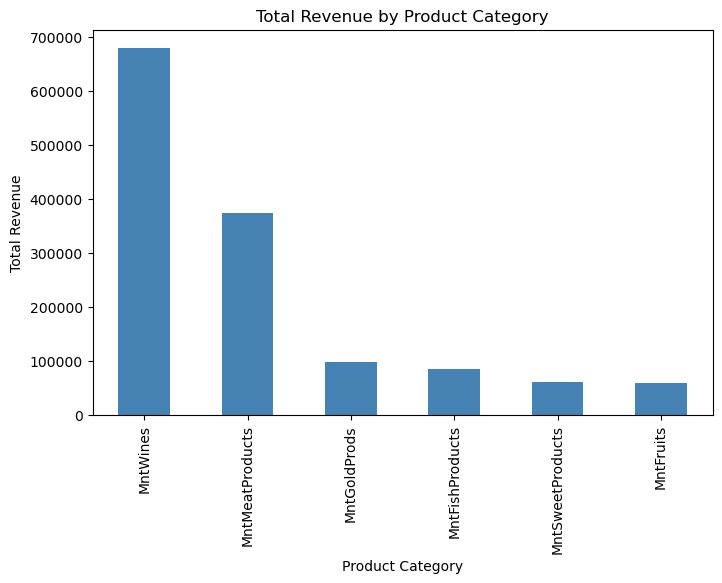

In [60]:
# Plot revenue by product category:

plt.figure(figsize=(8,5))
product_revenue.plot(kind='bar', color='steelblue')
plt.title("Total Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.show()

## 10.2 - Age vs Campaign Acceptance

* Compared Age distribution between responders and non-responders
* Visualized using a boxplot
* Calculated point-biserial correlation to measure association

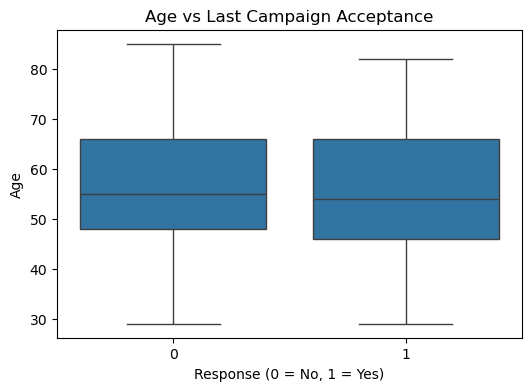

In [61]:
# Boxplot of Age vs Response:

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Response'], y=df['Age'])
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age vs Last Campaign Acceptance")
plt.show()

In [62]:
# Median Age by Response:

df.groupby('Response')['Age'].median()

Response
0    55.0
1    54.0
Name: Age, dtype: float64

In [64]:
# Point-Biserial correlation:

r, p = pointbiserialr(df['Response'], df['Age'])
print("Point-biserial correlation (r):", r)
print("p-value:", p)

Point-biserial correlation (r): -0.018424292565464954
p-value: 0.38375446666786445


## 10.3 - Campaign Acceptance by Country

* Grouped customers by country
* Counted total number of acceptances
* Visualized acceptance distribution by country

In [65]:
# Calculate acceptances by country:

acceptance_by_country = df.groupby('Country')['Response'].sum().sort_values(ascending=False)
acceptance_by_country

Country
SP     176
SA      52
CA      38
AUS     23
GER     17
IND     13
US      13
ME       2
Name: Response, dtype: int64

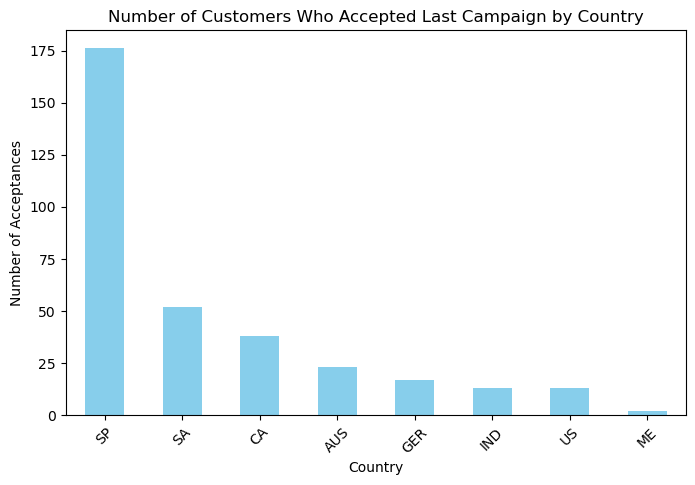

In [66]:
# Plot acceptances by country:

plt.figure(figsize=(8,5))
acceptance_by_country.plot(kind='bar', color='skyblue')
plt.title("Number of Customers Who Accepted Last Campaign by Country")
plt.ylabel("Number of Acceptances")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

## 10.4 - Total Children vs Total Spending

* Visualized spending for customers with different numbers of children
* Calculated median spending across groups
* Measured correlation strength using Spearman rank correlation

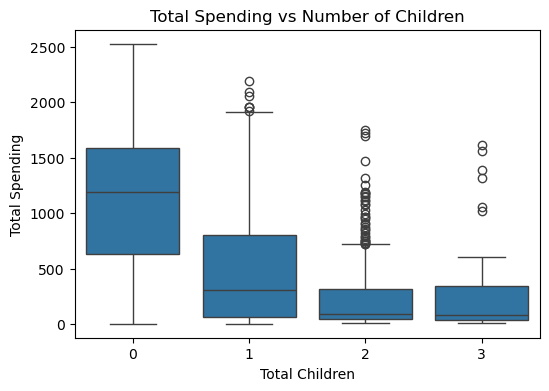

In [70]:
# Boxplot:

plt.figure(figsize=(6,4))
sns.boxplot(x=df['TotalChildren'], y=df['TotalSpending'])
plt.xlabel('Total Children')
plt.ylabel('Total Spending')
plt.title('Total Spending vs Number of Children')
plt.show()

In [71]:
# Median spending by children group:

df.groupby('TotalChildren')['TotalSpending'].median()

TotalChildren
0    1189.0
1     306.0
2      93.0
3      88.0
Name: TotalSpending, dtype: float64

In [72]:
# Spearman correlation test:

rho, p = spearmanr(df['TotalChildren'], df['TotalSpending'])
print("Spearman rho:", rho)
print("p-value:", p)

Spearman rho: -0.4835857068087243
p-value: 1.817901317197658e-131


## 10.5 - Complaints by Education Level

* Filtered only customers who complained
* Counted complaints by education category
* Visualized distribution using a bar chart

In [73]:
# Count complaints by education:

complaints_by_edu = df[df['Complain'] == 1]['Education'].value_counts()
complaints_by_edu

Education
Graduation    14
2n_Cycle       3
Master         2
PhD            1
Name: count, dtype: int64

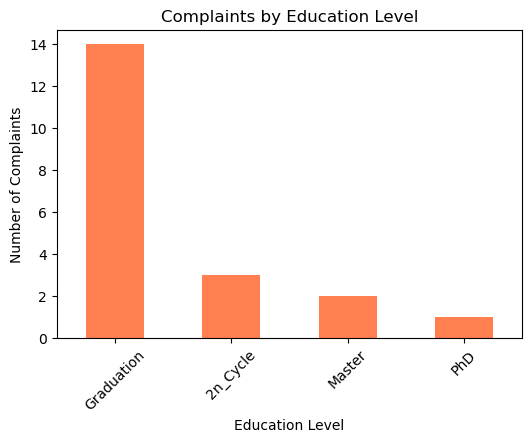

In [74]:
# Plot complaints by education:

plt.figure(figsize=(6,4))
complaints_by_edu.plot(kind='bar', color='coral')
plt.title("Complaints by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()

# Step 11: Final Project Summary

## Final Summary — Marketing Campaign Analysis

* Completed full data cleaning and preprocessing
* Engineered new features for deeper insights
* Performed exploratory data analysis
* Conducted outlier treatment and encoding
* Executed four hypothesis tests as required
* Generated key visual insights for business interpretation

## Key data preparation steps:

* Cleaned Income, Education, and Marital_Status categories
* Converted Dt_Customer to datetime format
* Imputed missing income values using Education + Marital_Status groups
* Removed unrealistic Age values
* Created TotalChildren, Age, TotalSpending, and TotalPurchases

## Key EDA findings:

* Income and spending variables are right-skewed
* Wines and Meat are the highest revenue products
* TotalSpending strongly correlates with premium product categories
* Multi-channel shoppers tend to spend more

## Hypothesis testing results:

* Older customers show very weak preference for in-store shopping
* Customers with more children do not prefer online shopping; they shop less
* No evidence of channel cannibalization — store, web, and catalog purchases rise together
* US customers do not significantly outperform non-US customers in spending

## Key visual insights:

* Spain has the highest campaign acceptance
* Campaign acceptance is not influenced by Age
* Families with more children spend significantly less
* Most complaints come from Graduation-level customers

## Business insights:

* Spain is highly responsive — stronger marketing focus recommended
* High-value customers tend to have no children
* Multi-channel engagement drives higher spending
* Graduation-level customers may need better support or communication